In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs

netcdf_index loaded.


/home/156/aek156/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
def savefigure(fname):
    plt.savefig(fname)  # comment out to disable saving
    return

## Snapshots of surface current speed

In [3]:
configs = ['access-om2','access-om2-025','access-om2-01'] # configuration is a directory in /g/data3/hh5/tmp/cosima
expts = ['1deg_jra55v13_ryf8485_spinup_A', '025deg_jra55_ryf_spinup7', '01deg_jra55v13_ryf8485_spinup6'] # expt to use for corresponding config
# years = ['1701', '1701', '1701']  # year to use for corresponding config
ncfile = 'ocean.nc'
fields = []
# location = [ minlon, maxlon, minlat, maxlat ]
location = [140-360,240-360,-65,-20]  # EAC, ACC, South Pacific
# location = [140-360,190-360,-65,-20]  # EAC and ACC
location = [145-360,175-360,-45,-20]  # EAC
# location = [125-360,155-360,25,50]  # Kuroshio
# location = [-85,-50,25,50]  # Gulf Stream
# location = [10,40,-45,-20]  # Agulhas

In [4]:
for i, config in enumerate(configs):
    expt = expts[i]
#     year = years[i]
    print(str(i) + ' ' + config + ' ' + expt)
    u = cc.get_nc_variable(expt, ncfile, 'u',n=1).isel(st_ocean=0).isel(time=0).sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
    v = cc.get_nc_variable(expt, ncfile, 'v',n=1).isel(st_ocean=0).isel(time=0).sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
#     ## Load zonal velocity from expt, pick up one year 
# #     tmp = cc.get_nc_variable(expt, 'ocean.nc', 'u', n=12, time_units = 'days since 1700-01-01').isel(st_ocean=0)
# #     u = tmp.sel(time=slice(year+'-01', year+'-12')).mean('time').sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
#     del(tmp)
#     ## Load meridional velocity from expt, pick up one year 
#     tmp = cc.get_nc_variable(expt, 'ocean.nc', 'v', n=12, time_units = 'days since 1700-01-01').isel(st_ocean=0)
#     v = tmp.sel(time=slice(year+'-01', year+'-12')).mean('time').sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
#     del(tmp)
    fields.append(np.sqrt(u**2+v**2))
    del(u,v)

0 access-om2 1deg_jra55v13_ryf8485_spinup_A


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

/home/156/aek156/github/OceansAus/cosima-cookbook/cosima_cookbook/netcdf_index.py:368: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

1 access-om2-025 025deg_jra55_ryf_spinup7


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

2 access-om2-01 01deg_jra55v13_ryf8485_spinup6


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

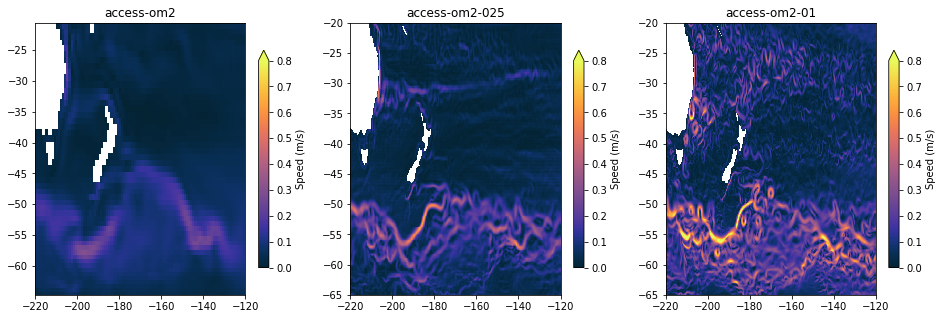

In [63]:
# all cases in one fig
fname = '../../figures/speed_'
fig = plt.figure(figsize=(16,5))
for i, config in enumerate(configs):
    fname += config + '_' + expts[i] + '_'
    ax = fig.add_subplot(1, len(configs), i+1)
    cax = ax.pcolormesh(fields[i].xu_ocean, fields[i].yu_ocean, fields[i], 
                        shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=.8)
    fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
    plt.title(config, fontsize=12)
fname += str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png'
#plt.savefig(fname,dpi=300)

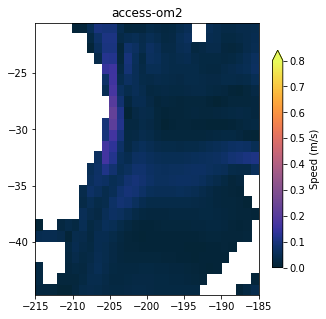

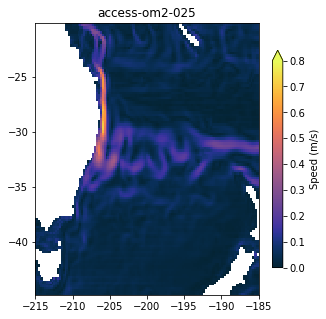

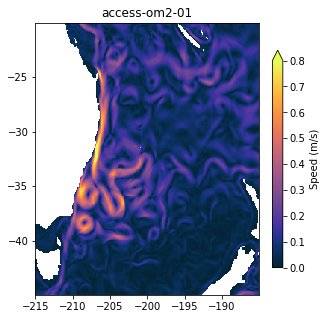

In [6]:
# separate fig for each case
for i, config in enumerate(configs):
    fig = plt.figure(figsize=(5,5))
#     fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    cax = ax.pcolormesh(fields[i].xu_ocean, fields[i].yu_ocean, fields[i], 
                        shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=.8)
    fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
    plt.title(config, fontsize=12)
#    plt.savefig('../../figures/speed_' + config + '_' + expts[i] + '_' + str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png',dpi=300)

## Snapshots of SST

In [118]:
# configs = ['access-om2','access-om2-025','access-om2-01'] # configuration is a directory in /g/data3/hh5/tmp/cosima
# expts = ['1deg_jra55v13_ryf8485_spinup_A', '025deg_jra55_ryf_spinup7', '01deg_jra55v13_ryf8485_spinup6'] # expt to use for corresponding config

configs = ['access-om2','access-om2-01'] # configuration is a directory in /g/data3/hh5/tmp/cosima
expts = ['1deg_jra55v13_ryf8485_spinup_A', '01deg_jra55v13_ryf8485_spinup6'] # expt to use for corresponding config

# years = ['1701', '1701', '1701']  # year to use for corresponding config
ncfile = 'ocean_month.nc'
fields = []
# location = [ minlon, maxlon, minlat, maxlat ]
location = [140-360,240-360,-65,-20]  # EAC, ACC, South Pacific
# location = [140-360,190-360,-65,-20]  # EAC and ACC
# location = [145-360,175-360,-45,-20]  # EAC
# location = [125-360,155-360,25,50]  # Kuroshio
# location = [-85,-50,25,50]  # Gulf Stream
# location = [10,40,-45,-20]  # Agulhas

In [119]:
for i, config in enumerate(configs):
    expt = expts[i]
    print(str(i) + ' ' + config + ' ' + expt)
    sst = cc.get_nc_variable(expt, ncfile, 'surface_temp',n=1).isel(time=0).sel(xt_ocean=slice(location[0], location[1])).sel(yt_ocean=slice(location[2], location[3]))
#     v = cc.get_nc_variable(expt, ncfile, 'v',n=1).isel(st_ocean=0).isel(time=0).sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
#     ## Load zonal velocity from expt, pick up one year 
# #     tmp = cc.get_nc_variable(expt, 'ocean.nc', 'u', n=12, time_units = 'days since 1700-01-01').isel(st_ocean=0)
# #     u = tmp.sel(time=slice(year+'-01', year+'-12')).mean('time').sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
#     del(tmp)
#     ## Load meridional velocity from expt, pick up one year 
#     tmp = cc.get_nc_variable(expt, 'ocean.nc', 'v', n=12, time_units = 'days since 1700-01-01').isel(st_ocean=0)
#     v = tmp.sel(time=slice(year+'-01', year+'-12')).mean('time').sel(xu_ocean=slice(location[0], location[1])).sel(yu_ocean=slice(location[2], location[3]))
#     del(tmp)
    fields.append(sst)
    del(sst)

0 access-om2 1deg_jra55v13_ryf8485_spinup_A


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

/home/156/aek156/github/OceansAus/cosima-cookbook/cosima_cookbook/netcdf_index.py:368: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


1 access-om2-01 01deg_jra55v13_ryf8485_spinup6


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

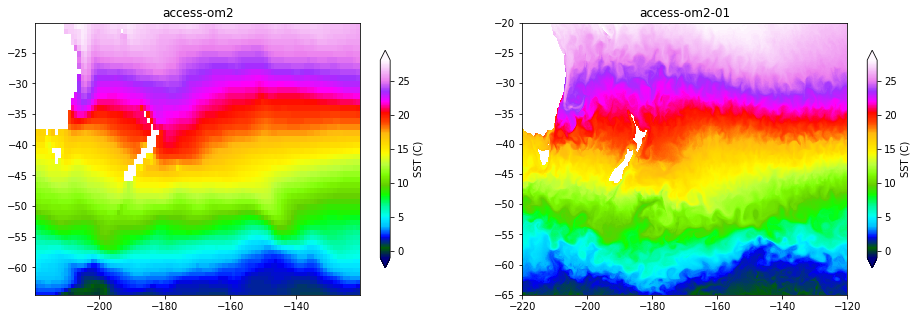

In [135]:
# all cases in one fig
fname = '../../figures/sst_'
fig = plt.figure(figsize=(16,5))
for i, config in enumerate(configs):
    fname += config + '_' + expts[i] + '_'
    ax = fig.add_subplot(1, len(configs), i+1)
    cax = ax.pcolormesh(fields[i].xt_ocean, fields[i].yt_ocean, fields[i]-273.15, 
                        shading='flat', cmap=plt.cm.gist_ncar, vmin=-1, vmax=28)
    fig.colorbar(cax,shrink=0.8,label='SST (C)',extend='both')
    plt.title(config, fontsize=12)
fname += str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png'
#plt.savefig(fname,dpi=300)

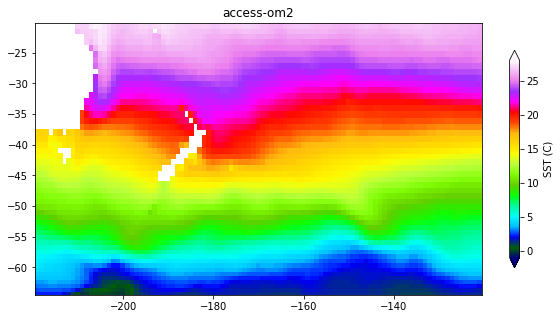

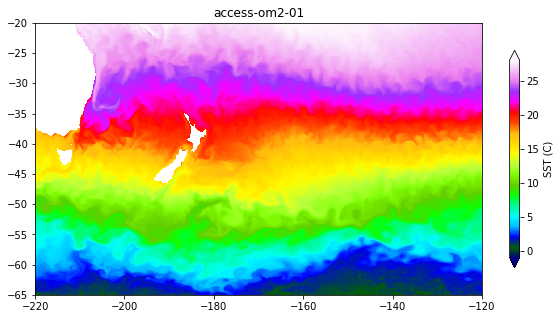

In [136]:
# separate fig for each case
for i, config in enumerate(configs):
#     fig = plt.figure(figsize=(5,5))
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    cax = ax.pcolormesh(fields[i].xt_ocean, fields[i].yt_ocean, fields[i]-273.15, 
                        shading='flat', cmap=plt.cm.gist_ncar, vmin=-1, vmax=28)
    fig.colorbar(cax,shrink=0.8,label='SST (C)',extend='both')
    plt.title(config, fontsize=12)
#    plt.savefig('../../figures/sst_' + config + '_' + expts[i] + '_' + str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png',dpi=300)

## Sea ice monthly average

In [5]:
# from 
# http://www.ceda.ac.uk/static/media/uploads/ncas-reading-2015/10_read_netcdf_python.pdf
# http://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/
from netCDF4 import Dataset
import numpy as np

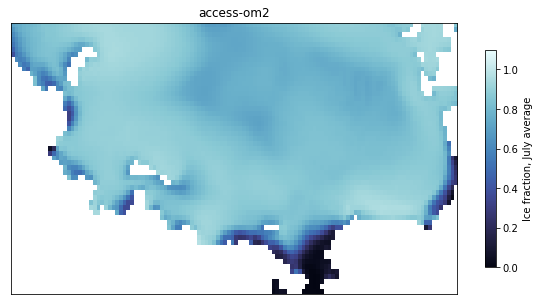

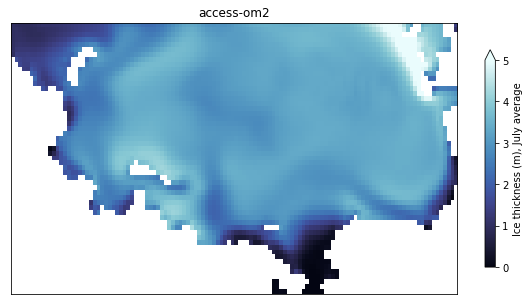

In [107]:
# 1 degree

config = 'access-om2'
expt = '1deg_jra55v13_ryf8485_spinup_A'
fn1 = '/g/data3/hh5/tmp/cosima/' + config + '/' +  expt + '/output393/ice/OUTPUT/iceh.0787-07.nc'
nc1 = Dataset(fn1)
nc1.variables.keys()
aice1 = nc1.variables['aice_m'][:][0,:,:]
hi1 = nc1.variables['hi_m'][:][0,:,:]

nc1.close()
fig = plt.figure(figsize=(10,5))
cax = plt.imshow(aice1[245:300,30:150],
                 interpolation='none',origin='lower', aspect='auto',
                 cmap=cm.cm.ice, vmin=0, vmax=1.1)
fig.colorbar(cax,shrink=0.8,label='Ice fraction, July average')
plt.title(config, fontsize=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('../../figures/aice_m_' + config + '_' + expt + '.png',dpi=300)
    
fig = plt.figure(figsize=(10,5))
cax = plt.imshow(hi1[245:300,30:150],
                 interpolation='none',origin='lower', aspect='auto',
                 cmap=cm.cm.ice, vmin=0, vmax=5)
fig.colorbar(cax,shrink=0.8,label='Ice thickness (m), July average',extend='max')
plt.title(config, fontsize=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('../../figures/hi_m_' + config + '_' + expt + '.png',dpi=300)

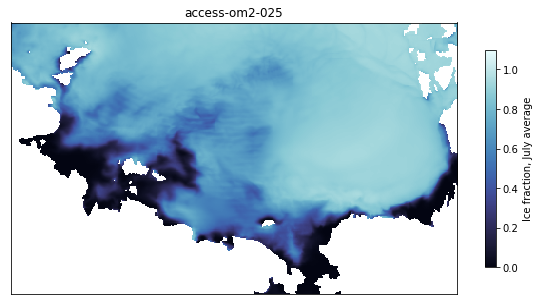

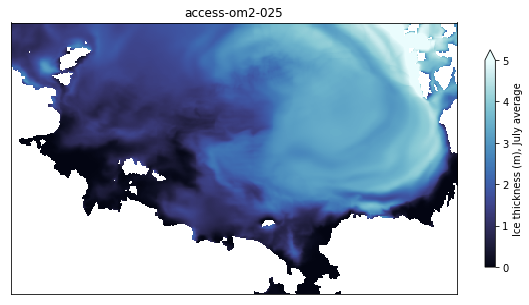

In [117]:
# 0.25 degree

config = 'access-om2-025'
expt = '025deg_jra55_ryf_spinup7'
fn025 = '/g/data3/hh5/tmp/cosima/' + config + '/' +  expt + '/output149/ice/OUTPUT/iceh.0150-07.nc'
nc025 = Dataset(fn025)
nc025.variables.keys()
aice025 = nc025.variables['aice_m'][:][0,:,:]
hi025 = nc025.variables['hi_m'][:][0,:,:]

nc025.close()
fig = plt.figure(figsize=(10,5))
cax = plt.imshow(aice025[840:1080,130:600],#,[525:1080,75:375],#[245:300,30:150],[2100:2700,300:1500]
                 interpolation='none',origin='lower', aspect='auto',
                 cmap=cm.cm.ice, vmin=0, vmax=1.1)
fig.colorbar(cax,shrink=0.8,label='Ice fraction, July average')
plt.title(config, fontsize=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('../../figures/aice_m_' + config + '_' + expt + '.png',dpi=300)
    
fig = plt.figure(figsize=(10,5))
cax = plt.imshow(hi025[840:1080,130:600],
                 interpolation='none',origin='lower', aspect='auto',
                 cmap=cm.cm.ice, vmin=0, vmax=5)
fig.colorbar(cax,shrink=0.8,label='Ice thickness (m), July average',extend='max')
plt.title(config, fontsize=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('../../figures/hi_m_' + config + '_' + expt + '.png',dpi=300)

([], <a list of 0 Text yticklabel objects>)

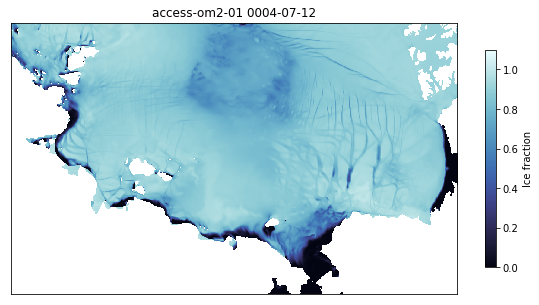

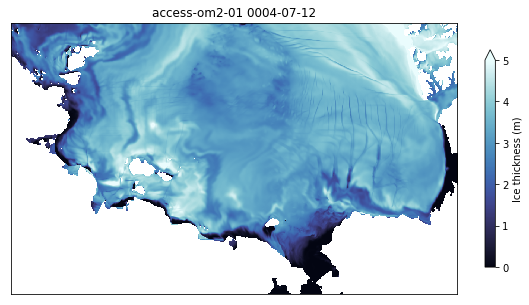

In [6]:
# 0.1 degree

config = 'access-om2-01'
expt = '01deg_jra55v13_ryf8485_spinup6'
date = '0004-07-05' # nicest view
date = '0004-07-12'
fn01 = '/g/data3/hh5/tmp/cosima/' + config + '/' +  expt + '/output023/ice/OUTPUT/iceh.' + date + '.nc'

nc01 = Dataset(fn01)
nc01.variables.keys()
# lon01 = np.ma.getdata(nc01.variables['TLON'][:])
# lat01 = np.ma.getdata(nc01.variables['TLAT'][:])
aice01 = nc01.variables['aice'][:][0,:,:]
hi01 = nc01.variables['hi'][:][0,:,:]

nc01.close()
fig = plt.figure(figsize=(10,5))
cax = plt.imshow(aice01[2100:2700,300:1500], #[50:500, 700:1500],
                 interpolation='none',origin='lower', aspect='auto',
                 cmap=cm.cm.ice, vmin=0, vmax=1.1)
fig.colorbar(cax,shrink=0.8,label='Ice fraction')
plt.title(config + ' ' + date, fontsize=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('../../figures/aice_' + config + '_' + expt + '_' + date + '.png',dpi=300)

fig = plt.figure(figsize=(10,5))
cax = plt.imshow(hi01[2100:2700,300:1500], #[50:500, 700:1500],
                 interpolation='none',origin='lower', aspect='auto',
                 cmap=cm.cm.ice, vmin=0, vmax=5)
fig.colorbar(cax,shrink=0.8,label='Ice thickness (m)',extend='max')
plt.title(config + ' ' + date, fontsize=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('../../figures/hi_' + config + '_' + expt + '_' + date + '.png',dpi=300)

In [26]:
import glob
config = 'access-om2-01'
expt = '01deg_jra55v13_ryf8485_spinup6'
dailypat = '/g/data3/hh5/tmp/cosima/' + config + '/' +  expt + '/output*/ice/OUTPUT/iceh.[0-9]*-[0-9]*-[0-9]*.nc'
monthlypat = '/g/data3/hh5/tmp/cosima/' + config + '/' +  expt + '/output*/ice/OUTPUT/iceh.[0-9]*-[0-9]*.nc'
dailypaths = sorted(glob.glob(dailypat))
monthlypaths = sorted(glob.glob(monthlypat))

# dailypaths
# dailypaths.sort()

for p in dailypaths:
    nc = Dataset(p)
    print(nc.variables.keys())
    break

for p in monthlypaths:
    nc = Dataset(p)
    print(nc.variables.keys())
    break
monthlypaths
dailypaths



odict_keys(['time', 'time_bounds', 'TLON', 'TLAT', 'ULON', 'ULAT', 'NCAT', 'tmask', 'blkmask', 'tarea', 'uarea', 'dxt', 'dyt', 'dxu', 'dyu', 'HTN', 'HTE', 'ANGLE', 'ANGLET', 'hi', 'aice', 'sss', 'fsalt', 'fsalt_ai'])
odict_keys(['time', 'time_bounds', 'TLON', 'TLAT', 'ULON', 'ULAT', 'NCAT', 'tmask', 'blkmask', 'tarea', 'uarea', 'dxt', 'dyt', 'dxu', 'dyu', 'HTN', 'HTE', 'ANGLE', 'ANGLET', 'hi', 'aice', 'sss', 'fsalt', 'fsalt_ai'])


['/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-01.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-02.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-03.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-04.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-05.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-06.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-07.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-08.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh

## Other attempts at sea ice plots

In [27]:
# from https://gist.github.com/blaylockbk/37dfcba1a6b31a4d6ccd350a5283c976
from scipy.io import netcdf
fn01 = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output028/ice/OUTPUT'

fn01 = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output023/ice/OUTPUT/iceh.0004-07-05.nc'
ncf = netcdf.netcdf_file(fn01,'r')
ncf.variables
hi01=nc.variables['hi']

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [64]:
configs = ['access-om2','access-om2-025','access-om2-01'] # configuration is a directory in /g/data3/hh5/tmp/cosima
expts = ['1deg_jra55v13_ryf8485_spinup_A', '025deg_jra55_ryf_spinup7', '01deg_jra55v13_ryf8485_spinup6'] # expt to use for corresponding config
# years = ['1701', '1701', '1701']  # year to use for corresponding config
ncfile = 'iceh.\d+-\d+.nc'
# ncfile = 'iceh.\d+-12.nc'
# ncfile = 'iceh.*-12.nc'
# ncfile = 'iceh.\d+-\d+-\d+.nc'
# ncfile = 'iceh.*-*-*.nc'
# ncfile = 'iceh.*.nc' # why does this not work with 'aice_m' when ncfile = 'iceh.\d+-\d+-\d+.nc' does??


fields = []
# location = [ minlon, maxlon, minlat, maxlat ]
# location = [140-360,240-360,-65,-20]  # EAC, ACC, South Pacific
# location = [0,359,-65,-50]  # Antarctic
# location = [140-360,190-360,-65,-20]  # EAC and ACC
# location = [145-360,175-360,-45,-20]  # EAC
# location = [125-360,155-360,25,50]  # Kuroshio
# location = [-85,-50,25,50]  # Gulf Stream
# location = [10,40,-45,-20]  # Agulhas

# configs = [configs[2]]
# expts = [expts[2]]

In [65]:
for i, config in enumerate(configs):
    expt = expts[i]
    print(str(i) + ' ' + config + ' ' + expt)
    aice_m = cc.get_nc_variable(expt, ncfile, 'aice_m',n=1).isel(time=0) #.sel(TLON=slice(location[0], location[1])).sel(TLAT=slice(location[2], location[3]))
#     aice_m = cc.get_nc_variable(expt, ncfile, 'hi',n=1).isel(time=0) #.sel(TLON=slice(location[0], location[1])).sel(TLAT=slice(location[2], location[3]))
    fields.append(aice_m)
    del(aice_m)

0 access-om2 1deg_jra55v13_ryf8485_spinup_A


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

1 access-om2-025 025deg_jra55_ryf_spinup7


/home/156/aek156/github/OceansAus/cosima-cookbook/cosima_cookbook/netcdf_index.py:368: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

2 access-om2-01 01deg_jra55v13_ryf8485_spinup6


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

In [66]:
# trim off to look at Ross Sea
fields[0]=fields[0][4:50, 70:150]
fields[1]=fields[1][20:200, 280:600]
fields[2]=fields[2][50:500, 700:1500]

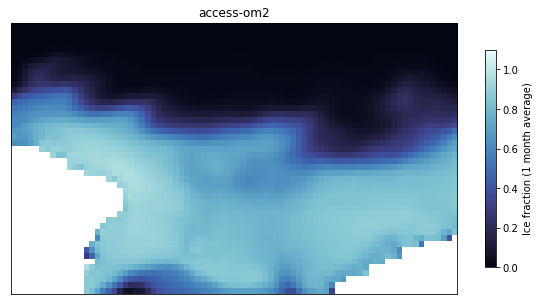

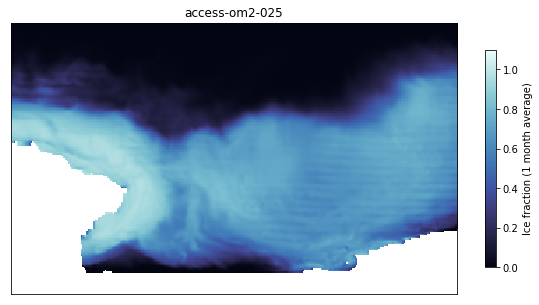

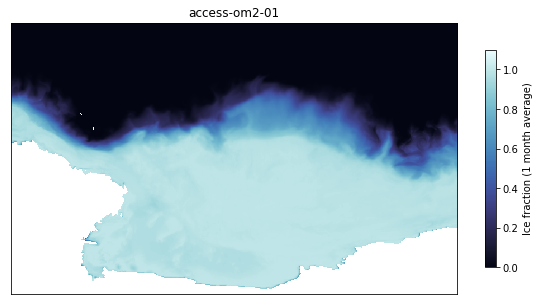

In [67]:
for i, config in enumerate(configs):
#     fig = plt.figure(figsize=(5,5))
    fig = plt.figure(figsize=(10,5))
    cax = plt.imshow(fields[i],
                     interpolation='none',origin='lower', aspect='auto',
                     cmap=cm.cm.ice, vmin=0, vmax=1.1)
#                      extent=[700, 1500, 50,500])
    fig.colorbar(cax,shrink=0.8,label='Ice fraction (1 month average)')
    plt.title(config, fontsize=12)
    plt.xticks([])
    plt.yticks([])
#    plt.savefig('../../figures/aice_m_' + config + '_' + expts[i] + '_' + str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png',dpi=300)

In [34]:
fields[2].nj

<xarray.DataArray 'nj' (nj: 2700)>
array([   0,    1,    2, ..., 2697, 2698, 2699])
Coordinates:
    time     datetime64[ns] 1903-08-01
Dimensions without coordinates: nj

In [41]:
# separate fig for each case - using imshow

istart = 700/len(fields[2].ni)
iend = 1500/len(fields[2].ni)
jstart = 50/len(fields[2].nj)
jend = 500/len(fields[2].nj)

jstart
# location = [list(range(50,500))/len(fields[2].nj), list(range(700,1500))/len(fields[2].nj)]

?range

0.018518518518518517

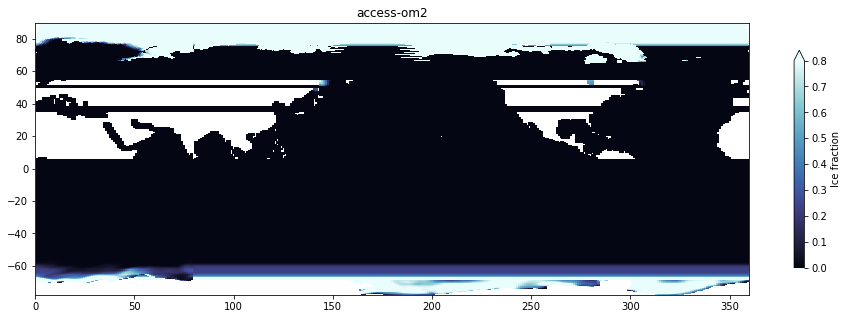

In [107]:
# all cases in one fig
fname = '../../figures/aice_m_'
fig = plt.figure(figsize=(16,5))
for i, config in enumerate(configs):
    fname += config + '_' + expts[i] + '_'
    ax = fig.add_subplot(1, len(configs), i+1)
    cax = ax.pcolormesh(fields[i].TLON, fields[i].TLAT, fields[i], 
                        shading='flat', cmap=cm.cm.ice, vmin=0, vmax=1)
    fig.colorbar(cax,shrink=0.8,label='Ice fraction',extend='max')
    plt.title(config, fontsize=12)
fname += str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png'
#plt.savefig(fname,dpi=300)

KeyboardInterrupt: 

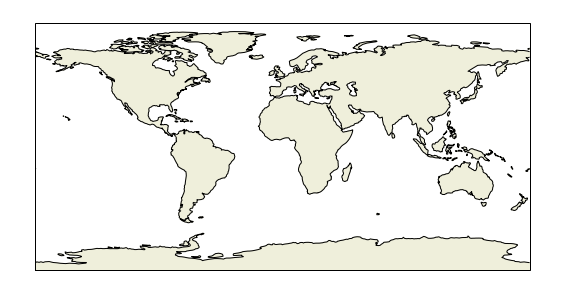

In [39]:
# separate fig for each case
for i, config in enumerate(configs):
#     fig = plt.figure(figsize=(5,5))
    fig = plt.figure(figsize=(10,5))
#     ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
    ax = plt.axes(projection=ccrs.PlateCarree())
#     ax.set_extent([0, 250, 30, 400])
    ax.add_feature(cartopy.feature.LAND)
    #ax1.add_feature(cartopy.feature.OCEAN)
    ax.coastlines()
    #ax1.stock_img()
#     ax.gridlines()

#     cax = ax.pcolormesh(fields[i].TLON, fields[i].TLAT, fields[i], 
#                         shading='flat', cmap=cm.cm.ice, vmin=0, vmax=1)

    cax = ax.pcolor(fields[i].TLON, fields[i].TLAT, fields[i], 
                        cmap=cm.cm.ice, vmin=0, vmax=1)

    fig.colorbar(cax,shrink=0.8,label='Ice fraction')
    plt.title(config, fontsize=12)
#    plt.savefig('../../figures/aice_m_' + config + '_' + expts[i] + '_' + str(int(location[0])) + '_to_' + str(int(location[1])) + 'E_' + str(int(location[2])) + '_to_' + str(int(location[3])) + 'N.png',dpi=300)

ValueError: dimensions ['TLAT'] do not exist

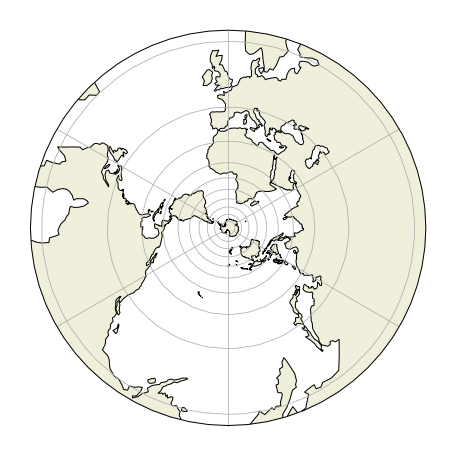

In [93]:
i=0

plt.figure(figsize=[8,8])
ax1 = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
#ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
#ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines()
#ax1.stock_img()
ax1.gridlines()

#.sel(TLAT=slice(-90, -60))\
quadmesh = fields[i].isel(TLAT=slice(200,300)).plot\
            .pcolormesh(ax=ax1, 
                        transform=ccrs.PlateCarree(),
                        vmax=2)

In [80]:
location

[-220, -120, -65, -20]

# Current speed vs obs

In [7]:
# configuration is a directory in /g/data3/hh5/tmp/cosima
configuration = 'access-om2-01'
# configuration = 'mom01v5'
#configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['01deg_jra55v13_ryf8485_spinup1',
 '01deg_jra55v13_ryf8485_spinup2',
 '01deg_jra55v13_ryf8485_spinup3',
 '01deg_jra55v13_ryf8485_spinup4',
 '01deg_jra55v13_ryf8485_spinup5',
 '01deg_jra55v13_ryf8485_spinup6',
 '01deg_jra55v13_ryf9091_spinup1']

In [8]:
?cc.get_experiments

In [9]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
expt = 'KDS75_newbathy_JRA' 
expt = '01deg_jra55v13_ryf8485_spinup6'


In [10]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

datadir = cc.netcdf_index.directoriesToSearch[0]
# !ls {datadir}/{configuration}/{expt}
# !ls {datadir}/{configuration}/{expt}/output028/ice/OUTPUT

output000  output005  output010  output015  output020  output025
output001  output006  output011  output016  output021  output026
output002  output007  output012  output017  output022  output027
output003  output008  output013  output018  output023  output028
output004  output009  output014  output019  output024


In [11]:
## Load zonal velocity from expt, pick up one year 
# tmp = cc.get_nc_variable(expt, 'ocean.nc', 'u',n=9, time_units = 'days since 1900-01-01').isel(st_ocean=0)
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'u', time_units = 'days since 1900-01-01').isel(st_ocean=0)
u = tmp.sel(time=slice('1901-01','1901-12')).mean('time')
del(tmp)
## Load meridional velocity from expt, pick up one year 
# tmp = cc.get_nc_variable(expt, 'ocean.nc', 'v',n=9, time_units = 'days since 1900-01-01').isel(st_ocean=0)
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'v', time_units = 'days since 1900-01-01').isel(st_ocean=0)
v = tmp.sel(time=slice('1901-01','1901-12')).mean('time')
del(tmp)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=29), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=29), HTML(value='')))

In [12]:
obs_file = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/drifter_annualmeans.nc').rename({'Lat':'latitude','Lon':'longitude'})
obs_u = obs_file['U']
obs_v = obs_file['V']

In [13]:
#tmp = cc.get_nc_variable(expt, 'iceh.*.nc', 'aice', time_units = 'days since 1900-01-01').isel(st_ocean=0)


In [14]:
# calcuate the speed 
vel = np.sqrt(u**2+v**2)
# vel = (u**2+v**2)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [15]:
obs_vel = np.sqrt(obs_u**2+obs_v**2)

In [16]:
vel.min()


<xarray.DataArray ()>
array(1.2463445374905517e-05)
Coordinates:
    st_ocean  float64 0.5413

In [17]:
# np.seterr(divide='ignore', invalid='ignore')
np.sqrt(vel)


<xarray.DataArray (yu_ocean: 2700, xu_ocean: 3600)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
    st_ocean  float64 0.5413
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 -80.88 ...
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...

In [18]:
u_kur = vel.sel(yu_ocean=slice(25,50)).sel(xu_ocean=slice(125.-360.,155.-360.)) # Kuroshio
obs_u_kur = obs_vel.sel(latitude=slice(25,50)).sel(longitude=slice(125.,155.)) # Kuroshio

u_gulf = vel.sel(yu_ocean=slice(25,50)).sel(xu_ocean=slice(-85.,-50.)) # Gulf stream
obs_u_gulf = obs_vel.sel(latitude=slice(25,50)).sel(longitude=slice(-85.,-50.)) # Gulf stream

u_east = vel.sel(yu_ocean=slice(-45,-20)).sel(xu_ocean=slice(145.-360.,175.-360.)) # East Australian Current
obs_u_east = obs_vel.sel(latitude=slice(-45,-20)).sel(longitude=slice(145.,175.)) # East Australian Current

u_agul = vel.sel(yu_ocean=slice(-45,-20)).sel(xu_ocean=slice(10.,40.)) # Agulhas Current
obs_u_agul = obs_vel.sel(latitude=slice(-45,-20)).sel(longitude=slice(10.,40.)) # Agulhas Current

In [19]:
u_kur.min()

<xarray.DataArray ()>
array(0.00020882122681029983)
Coordinates:
    st_ocean  float64 0.5413

Text(0.5,1,'Agulhas Current from drifter obs. (Laurindo et al., 2017)')

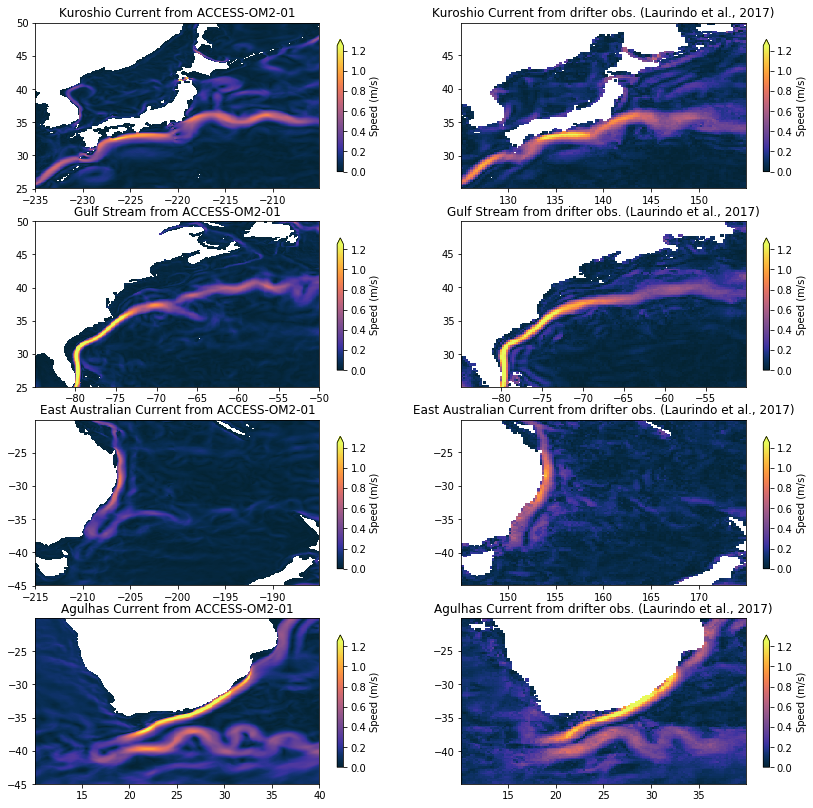

In [24]:
fig = plt.figure(figsize=(14,14))

ax = fig.add_subplot(4, 2, 1)
cax = ax.pcolormesh(u_kur.xu_ocean, u_kur.yu_ocean, u_kur, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Kuroshio Current from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(4, 2, 2)
cax = ax.pcolormesh(obs_u_kur.longitude, obs_u_kur.latitude, np.swapaxes(obs_u_kur,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Kuroshio Current from drifter obs. (Laurindo et al., 2017)', fontsize=12)

ax = fig.add_subplot(4, 2, 3)
cax = ax.pcolormesh(u_gulf.xu_ocean, u_gulf.yu_ocean, u_gulf, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Gulf Stream from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(4, 2, 4)
cax = ax.pcolormesh(obs_u_gulf.longitude, obs_u_gulf.latitude, np.swapaxes(obs_u_gulf,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Gulf Stream from drifter obs. (Laurindo et al., 2017)', fontsize=12)

ax = fig.add_subplot(4, 2, 5)
cax = ax.pcolormesh(u_east.xu_ocean, u_east.yu_ocean, u_east, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('East Australian Current from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(4, 2, 6)
cax = ax.pcolormesh(obs_u_east.longitude, obs_u_east.latitude, np.swapaxes(obs_u_east,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('East Australian Current from drifter obs. (Laurindo et al., 2017)', fontsize=12)

ax = fig.add_subplot(4, 2, 7)
cax = ax.pcolormesh(u_agul.xu_ocean, u_agul.yu_ocean, u_agul, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Agulhas Current from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(4, 2, 8)
cax = ax.pcolormesh(obs_u_agul.longitude, obs_u_agul.latitude, np.swapaxes(obs_u_agul,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Agulhas Current from drifter obs. (Laurindo et al., 2017)', fontsize=12)

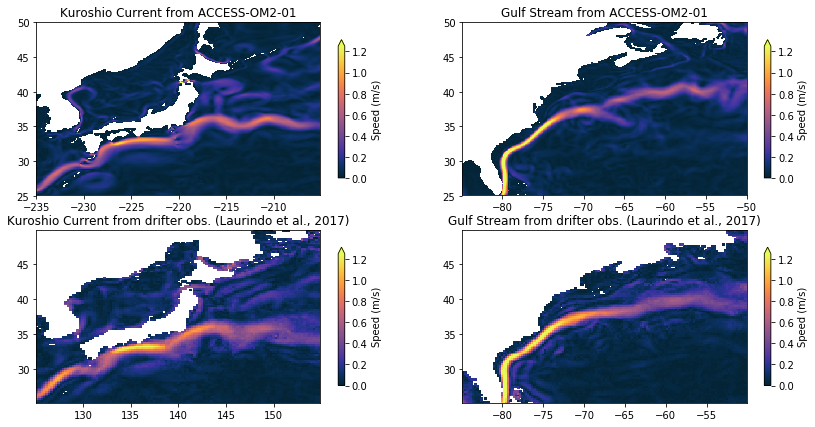

In [29]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(2, 2, 1)
cax = ax.pcolormesh(u_kur.xu_ocean, u_kur.yu_ocean, u_kur, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Kuroshio Current from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(2, 2, 3)
cax = ax.pcolormesh(obs_u_kur.longitude, obs_u_kur.latitude, np.swapaxes(obs_u_kur,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Kuroshio Current from drifter obs. (Laurindo et al., 2017)', fontsize=12)

ax = fig.add_subplot(2, 2, 2)
cax = ax.pcolormesh(u_gulf.xu_ocean, u_gulf.yu_ocean, u_gulf, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Gulf Stream from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(2, 2, 4)
cax = ax.pcolormesh(obs_u_gulf.longitude, obs_u_gulf.latitude, np.swapaxes(obs_u_gulf,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Gulf Stream from drifter obs. (Laurindo et al., 2017)', fontsize=12)

#plt.savefig('../../figures/speed_ACCESS-OM2-01_Laurindo_Kuroshio_Gulf_Stream.png',dpi=300)
    

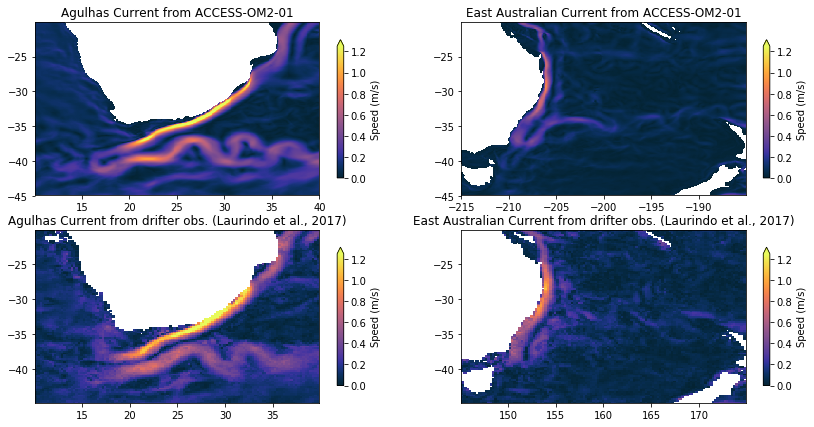

In [30]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(2, 2, 2)
cax = ax.pcolormesh(u_east.xu_ocean, u_east.yu_ocean, u_east, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('East Australian Current from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(2, 2, 4)
cax = ax.pcolormesh(obs_u_east.longitude, obs_u_east.latitude, np.swapaxes(obs_u_east,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('East Australian Current from drifter obs. (Laurindo et al., 2017)', fontsize=12)

ax = fig.add_subplot(2, 2, 1)
cax = ax.pcolormesh(u_agul.xu_ocean, u_agul.yu_ocean, u_agul, shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Agulhas Current from ACCESS-OM2-01', fontsize=12)

ax = fig.add_subplot(2, 2, 3)
cax = ax.pcolormesh(obs_u_agul.longitude, obs_u_agul.latitude, np.swapaxes(obs_u_agul,0,1), shading='flat', cmap=cm.cm.thermal, vmin=0, vmax=1.25)
fig.colorbar(cax,shrink=0.8,label='Speed (m/s)',extend='max')
plt.title('Agulhas Current from drifter obs. (Laurindo et al., 2017)', fontsize=12)

#plt.savefig('../../figures/speed_ACCESS-OM2-01_Laurindo_Agulhas_EAC.png',dpi=300)


# Comparing Model Resolution

This is a simple example to show how to plot the model bathymetry. It uses cartopy, and the recently developed 0.1° topography.

In [ ]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import IPython.display

In [ ]:
# Grabbing tenth degree data from our latest run. These are output monthly at the moment.
u01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','u',n=1).isel(st_ocean=0).isel(time=0)
v01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','v',n=1).isel(st_ocean=0).isel(time=0)
lons01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','geolon_c',n=1).isel(time=0)
lats01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','geolat_c',n=1).isel(time=0)
uv01 = np.sqrt(u01**2 + v01**2)
IPython.display.clear_output()

In [ ]:
# Grabbing quarter degree data from our latest run. These are output monthly at the moment.
u025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','iceh.\d+-\d+.nc','uocn_m',n=1).isel(time=0)
v025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','iceh.\d+-\d+.nc','vocn_m',n=1).isel(time=0)
lons025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','ocean_grid.nc','geolon_c',n=1).isel(time=0)
lats025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','ocean_grid.nc','geolat_c',n=1).isel(time=0)
uv025 = np.sqrt(u025**2 + v025**2)
IPython.display.clear_output()

In [ ]:
# Grabbing one degree data from our latest run. These are output monthly at the moment.
u1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','iceh.\d+-\d+.nc','uocn_m',n=1).isel(time=0)
v1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','iceh.\d+-\d+.nc','vocn_m',n=1).isel(time=0)
lons1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','ocean_grid.nc','geolon_c',n=1).isel(time=0)
lats1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','ocean_grid.nc','geolat_c',n=1).isel(time=0)
uv1 = np.sqrt(u1**2 + v1**2)
IPython.display.clear_output()

In [ ]:
np.ma.is_masked(uv1)

In [ ]:
np.ma.is_masked(lats1)

In [ ]:
uv1.sum().compute()

In [ ]:
lats1.min().compute()

In [ ]:
sum([0/0, 1])

In [ ]:
hasattr(uv1,'mask')

In [ ]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
ax.set_extent([5, 45, -50, -25])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons1, lats1, uv1, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(a) ACCESS-OM2')
#plt.savefig('../../figures/access-om2.png',dpi=200)


plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
ax.set_extent([5, 45, -50, -25])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons025, lats025, uv025, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(b) ACCESS-OM2-025')
#plt.savefig('../../figures/access-om2-025.png',dpi=200)


plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
ax.set_extent([5, 45, -50, -25])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons01, lats01, uv01, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(c) ACCESS-OM2-01')
#plt.savefig('../../figures/access-om2-01.png',dpi=200)



In [ ]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=150))
ax.set_extent([135, 180, -60, -30])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons1, lats1, uv1, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(a) ACCESS-OM2')


plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=150))
ax.set_extent([135, 180, -60, -30])

ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons025, lats025, uv025, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(b) ACCESS-OM2-025')


plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=150))
ax.set_extent([135, 180, -60, -30])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons01, lats01, uv01, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(c) ACCESS-OM2-01')


